## Base Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sales_data_base = pd.read_feather('Sales_data.ftr')
sales_df = sales_data_base.copy()


In [5]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
sales_df.shape

(186850, 6)

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Data Cleaning

### Take Care of Null and Duplicate Values

In [8]:
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
sales_df[sales_df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,None,None,None,None,None,None
356,None,None,None,None,None,None
735,None,None,None,None,None,None
1433,None,None,None,None,None,None
1553,None,None,None,None,None,None
...,...,...,...,...,...,...
185176,None,None,None,None,None,None
185438,None,None,None,None,None,None
186042,None,None,None,None,None,None
186548,None,None,None,None,None,None


In [13]:
sales_df.dropna(inplace=True)

In [22]:
sales_df[sales_df.duplicated(keep=False)].sort_values(by='Purchase Address')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4733,181084,Flatscreen TV,1,300,04/07/19 21:36,"1 Walnut St, Boston, MA 02215"
4734,181084,Flatscreen TV,1,300,04/07/19 21:36,"1 Walnut St, Boston, MA 02215"
129030,202212,Macbook Pro Laptop,1,1700,05/25/19 13:19,"10 1st St, San Francisco, CA 94016"
129031,202212,Macbook Pro Laptop,1,1700,05/25/19 13:19,"10 1st St, San Francisco, CA 94016"
55943,150917,Lightning Charging Cable,1,14.95,02/06/19 16:07,"111 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
18626,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
128103,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
127873,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
126111,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
sales_df.drop_duplicates(inplace=True)

In [24]:
sales_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [26]:
sales_df.duplicated().sum()

0

### Set the Order Date as the Index

In [27]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [44]:
sales_df[~sales_df['Order Date'].str.contains(r'^\d{2}/\d{2}/\d{2}\s\d{2}:\d{2}$')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [45]:
sales_df = sales_df[sales_df['Order Date'].str.contains(r'^\d{2}/\d{2}/\d{2}\s\d{2}:\d{2}$')]

In [49]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format = '%m/%d/%y %H:%M')

C:\Users\ritik\AppData\Local\Temp\ipykernel_34908\4227106059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format = '%m/%d/%y %H:%M')


In [51]:
sales_df.set_index('Order Date', inplace=True)

In [52]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


## Data Exploration

### View Sales Volume by Location

In [65]:
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
sales_df['State'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[2][1:3])
sales_df['Zip Code'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[2][5:])


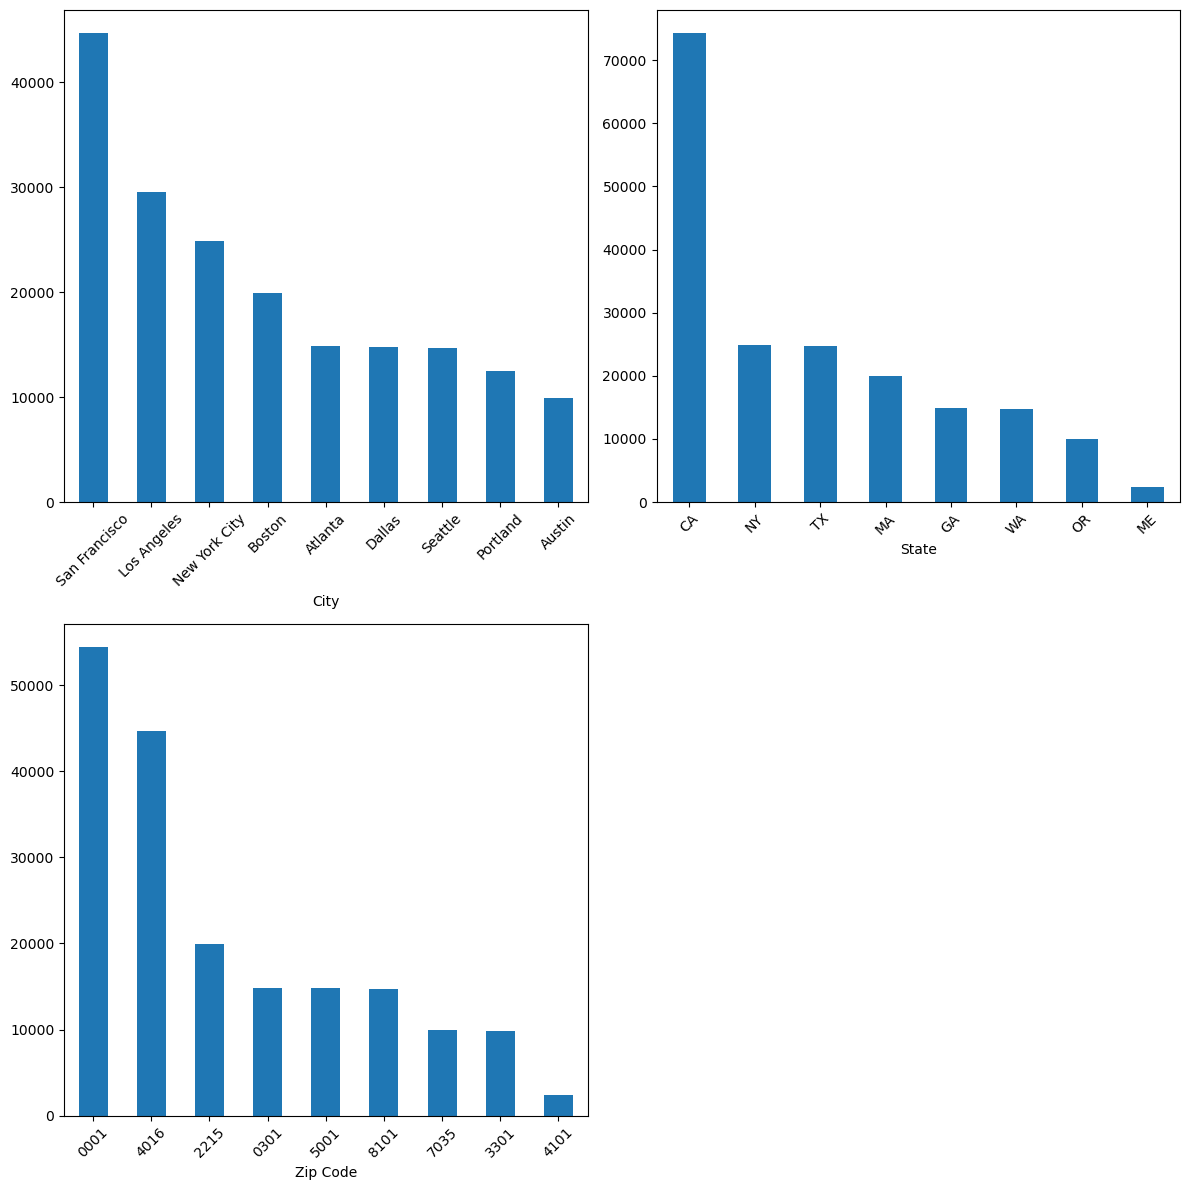

In [78]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sales_df['City'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(222)
sales_df['State'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(223)
sales_df['Zip Code'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.tight_layout()


### View Sales per Time Periods (week, month, quarter)

In [83]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City,State,Zip Code
Order Date,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",Dallas,TX,5001
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",Boston,MA,2215
2019-04-12 14:38:00,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,0001
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,0001
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,0001


In [87]:
sales_df['Total Price'] = sales_df['Quantity Ordered'].astype(float) * sales_df['Price Each'].astype(float)

In [110]:
sales_df = sales_df[sales_df.index.year == 2019]

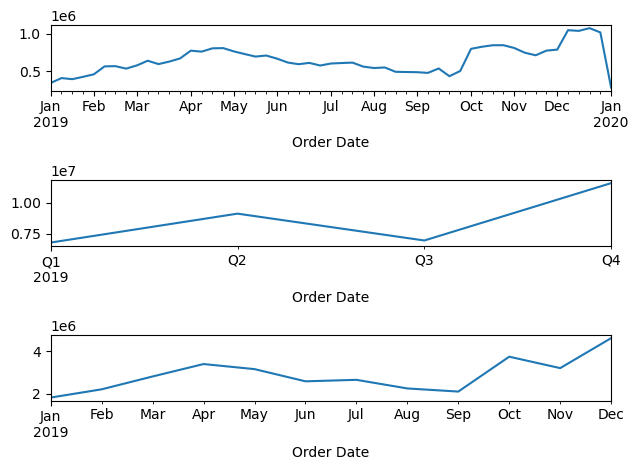

In [111]:
plt.subplot(311)
sales_df.resample('W')['Total Price'].sum().plot()
plt.subplot(312)
sales_df.resample('Q')['Total Price'].sum().plot()
plt.subplot(313)
sales_df.resample('M')['Total Price'].sum().plot()
plt.tight_layout()

### View Sales by Product

<Axes: ylabel='Product'>

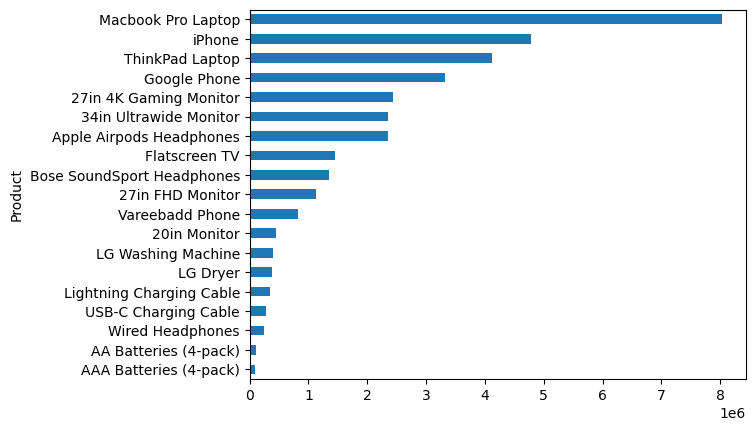

In [118]:
sales_df.groupby('Product')['Total Price'].sum().sort_values().plot(kind='barh')

### Sales by product for each State

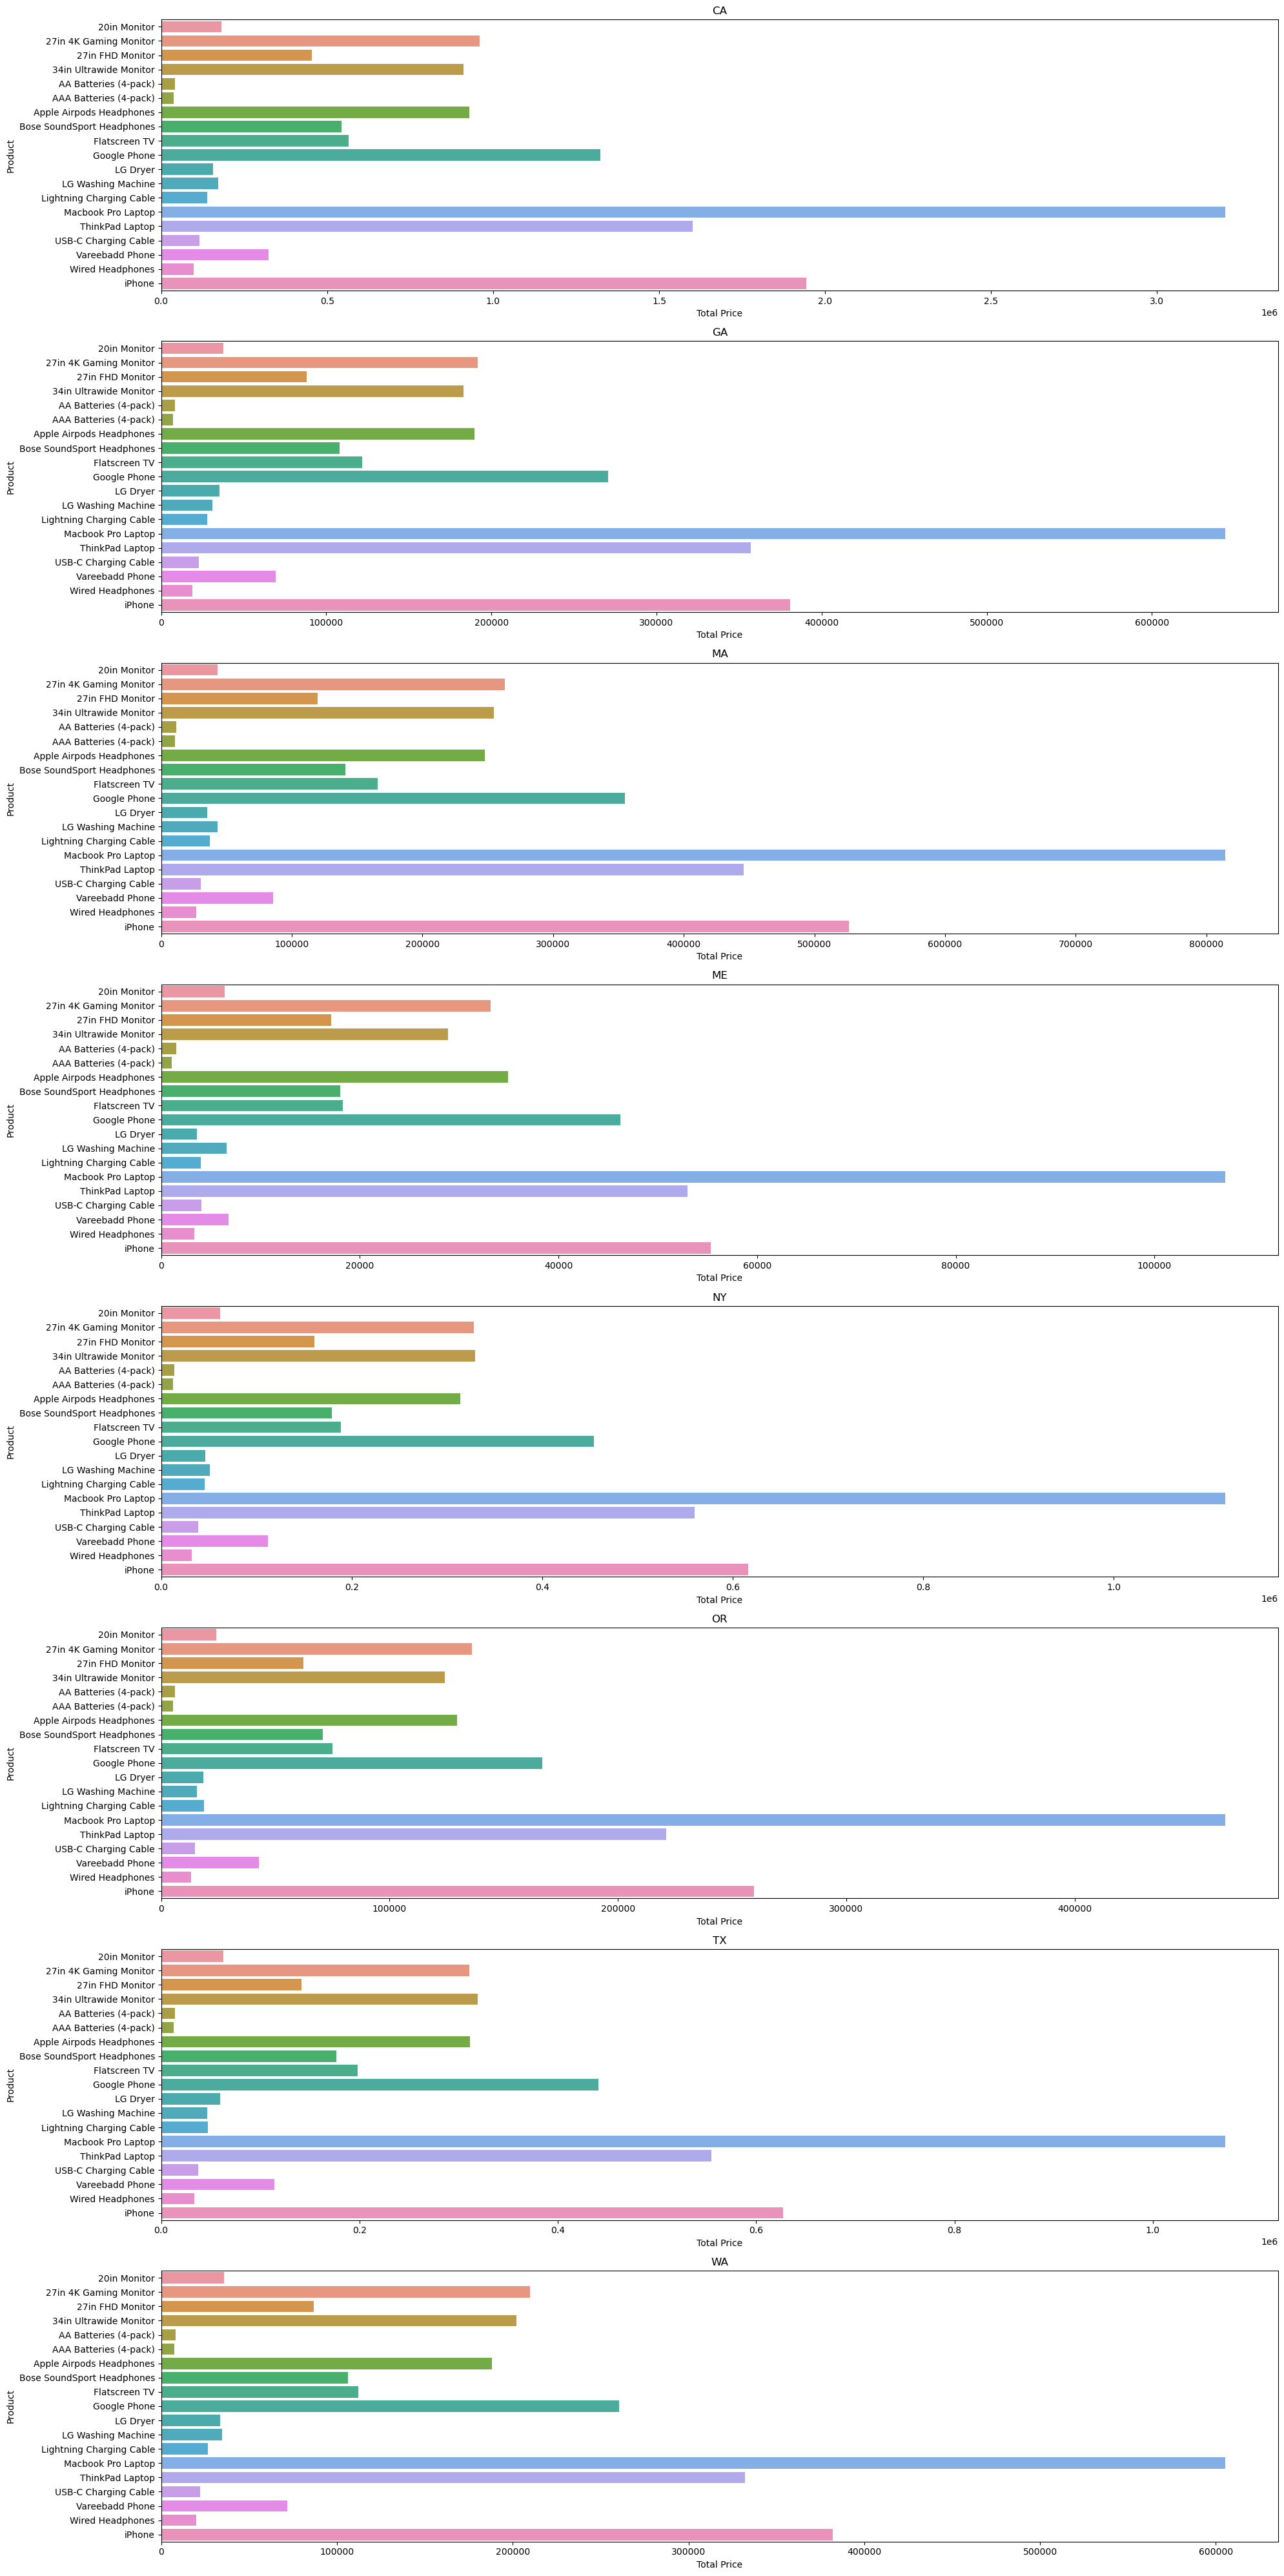

In [132]:
states_df = sales_df.groupby(['State', 'Product'])['Total Price'].sum().reset_index()
fig, ax = plt.subplots(ncols=1, nrows=len(states_df['State'].unique()), figsize=(20,40))

for i, state in enumerate(states_df['State'].unique()):
    plt.sca(ax[i])
    df = states_df[states_df['State'] == state]
    sns.barplot(data=df, x = 'Total Price', y = 'Product')
    plt.title(state)
plt.tight_layout()

### Products Sold Together

In [186]:
products_per_order_df = sales_df.groupby('Order ID')['Product'].apply(lambda x : sorted(list(x)))

In [187]:
products_per_order_df = pd.DataFrame(products_per_order_df)

In [188]:
products_per_order_df[products_per_order_df['Product'].str.len() > 3]

,Product
Order ID,
160873,"[Apple Airpods Headphones, Google Phone, Light..."
165665,"[AA Batteries (4-pack), Google Phone, USB-C Ch..."
193511,"[Bose SoundSport Headphones, Google Phone, USB..."
194253,"[Lightning Charging Cable, USB-C Charging Cabl..."
196615,"[Bose SoundSport Headphones, Google Phone, USB..."
212334,"[Apple Airpods Headphones, Lightning Charging ..."
235798,"[27in FHD Monitor, Google Phone, USB-C Chargin..."
242936,"[Apple Airpods Headphones, Lightning Charging ..."
263918,"[Bose SoundSport Headphones, USB-C Charging Ca..."


In [189]:
from itertools import combinations


In [190]:
sample = products_per_order_df[products_per_order_df['Product'].str.len() > 3].iloc[0]['Product']

In [191]:
list(combinations(sample,2))

[('Apple Airpods Headphones', 'Google Phone'),
 ('Apple Airpods Headphones', 'Lightning Charging Cable'),
 ('Apple Airpods Headphones', 'Wired Headphones'),
 ('Apple Airpods Headphones', 'iPhone'),
 ('Google Phone', 'Lightning Charging Cable'),
 ('Google Phone', 'Wired Headphones'),
 ('Google Phone', 'iPhone'),
 ('Lightning Charging Cable', 'Wired Headphones'),
 ('Lightning Charging Cable', 'iPhone'),
 ('Wired Headphones', 'iPhone')]

In [192]:
combo_df = pd.DataFrame(products_per_order_df['Product'].apply(lambda x: list(combinations(x,2))))

In [193]:
combo_df[(combo_df['Product'].str.len() > 0) & (combo_df['Product'].str.len() < 2)]

,Product
Order ID,
141275,"[(USB-C Charging Cable, Wired Headphones)]"
141290,"[(AA Batteries (4-pack), Apple Airpods Headpho..."
141365,"[(Vareebadd Phone, Wired Headphones)]"
141384,"[(Google Phone, USB-C Charging Cable)]"
141450,"[(Bose SoundSport Headphones, Google Phone)]"
...,...
319536,"[(Macbook Pro Laptop, Wired Headphones)]"
319556,"[(Google Phone, Wired Headphones)]"
319584,"[(Wired Headphones, iPhone)]"


In [195]:
exploded_combo_df = combo_df.explode('Product').dropna()

In [214]:
grouped_df = exploded_combo_df.groupby('Product').size().reset_index().sort_values(ascending=False, by=0)

In [216]:
grouped_df.columns = ["Product", 'Count']

<Axes: xlabel='Count', ylabel='Product'>

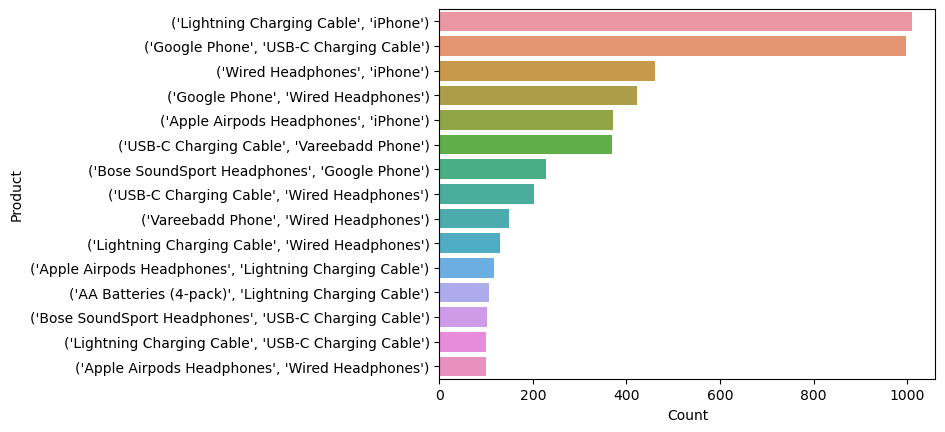

In [222]:
sns.barplot(data=grouped_df.head(15), orient='h', x='Count', y='Product')